In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [4]:
airbnb = pd.read_csv('data/airbnb_scaled.csv').iloc[:,1:]
airbnb.head()

,latitude,longitude,price,minimum_nights,calculated_host_listings_count,availability_365,has_reviews,multiple_host_listings,neighbourhood_prop_reviews,neighbourhood_total_listings,bronx,brooklyn,manhattan,queens,entire_home_apt,private_room
0,-1.035130,-0.356662,0.405660,-0.50,5.0,1.409692,1,1,-0.107057,-0.454414,0,1,0,0,0,1
1,0.418407,-0.600278,1.122642,-0.50,1.0,1.365639,1,1,-3.441776,0.206464,0,0,1,0,1,0
2,1.177155,0.294476,0.415094,0.00,0.0,1.409692,0,0,0.510114,0.743367,0,0,1,0,0,1
3,-0.519482,-0.087189,-0.160377,-0.50,0.0,0.656388,1,0,0.699991,-0.262904,0,1,0,0,1,0
4,1.033212,0.249813,-0.245283,1.75,0.0,-0.198238,1,0,0.822819,0.000000,0,0,1,0,1,0


In [5]:
airbnb_reordered = airbnb.iloc[:, :6]
airbnb_reordered[airbnb.columns[7:]] = airbnb.iloc[:, 7:]
airbnb_reordered['has_reviews'] = airbnb['has_reviews']
airbnb_reordered.head()

,latitude,longitude,price,minimum_nights,calculated_host_listings_count,availability_365,multiple_host_listings,neighbourhood_prop_reviews,neighbourhood_total_listings,bronx,brooklyn,manhattan,queens,entire_home_apt,private_room,has_reviews
0,-1.035130,-0.356662,0.405660,-0.50,5.0,1.409692,1,-0.107057,-0.454414,0,1,0,0,0,1,1
1,0.418407,-0.600278,1.122642,-0.50,1.0,1.365639,1,-3.441776,0.206464,0,0,1,0,1,0,1
2,1.177155,0.294476,0.415094,0.00,0.0,1.409692,0,0.510114,0.743367,0,0,1,0,0,1,0
3,-0.519482,-0.087189,-0.160377,-0.50,0.0,0.656388,0,0.699991,-0.262904,0,1,0,0,1,0,1
4,1.033212,0.249813,-0.245283,1.75,0.0,-0.198238,0,0.822819,0.000000,0,0,1,0,1,0,1


In [42]:
X = airbnb_reordered.iloc[:, :-1].values
from sklearn.cluster import KMeans 

k_mean = KMeans(init = 'k-means++', n_clusters = 2, n_init = 12)
k_mean.fit(X)

k_mean.labels_[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
airbnb_reordered['cluster'] = k_mean.labels_
airbnb_reordered.head()

,latitude,longitude,price,minimum_nights,calculated_host_listings_count,availability_365,multiple_host_listings,neighbourhood_prop_reviews,neighbourhood_total_listings,bronx,brooklyn,manhattan,queens,entire_home_apt,private_room,has_reviews,cluster
0,-1.035130,-0.356662,0.405660,-0.50,5.0,1.409692,1,-0.107057,-0.454414,0,1,0,0,0,1,1,0
1,0.418407,-0.600278,1.122642,-0.50,1.0,1.365639,1,-3.441776,0.206464,0,0,1,0,1,0,1,0
2,1.177155,0.294476,0.415094,0.00,0.0,1.409692,0,0.510114,0.743367,0,0,1,0,0,1,0,0
3,-0.519482,-0.087189,-0.160377,-0.50,0.0,0.656388,0,0.699991,-0.262904,0,1,0,0,1,0,1,0
4,1.033212,0.249813,-0.245283,1.75,0.0,-0.198238,0,0.822819,0.000000,0,0,1,0,1,0,1,0


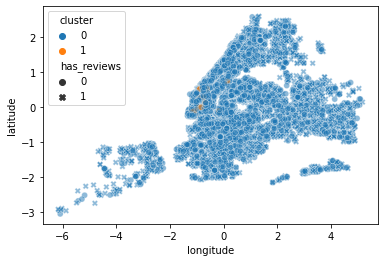

In [44]:
sns.scatterplot(data = airbnb_reordered, x = 'longitude', y = 'latitude', hue = 'cluster', style = 'has_reviews', alpha = 0.5);

In [45]:
airbnb_reordered['cluster'].value_counts()

0    48336
1      559
Name: cluster, dtype: int64

In [46]:
airbnb_reordered.groupby(['manhattan', 'cluster'])['has_reviews'].sum()

manhattan  cluster
0          0          22211
           1              0
1          0          16397
           1            235
Name: has_reviews, dtype: int64

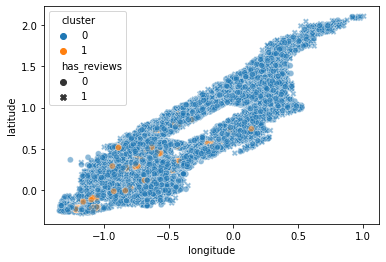

In [47]:
sns.scatterplot(data = airbnb_reordered[airbnb_reordered['manhattan'] == 1], 
                x = 'longitude', y = 'latitude', hue = 'cluster', style = 'has_reviews', alpha = 0.5);

<AxesSubplot:xlabel='longitude', ylabel='price'>

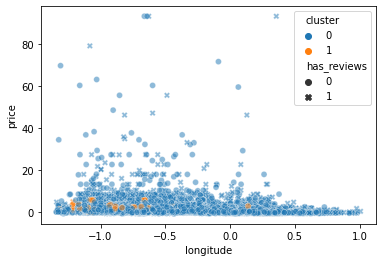

In [31]:
sns.scatterplot(data = airbnb_reordered[(airbnb_reordered['manhattan']==1)], x = 'longitude', y = 'price', hue = 'cluster', style = 'has_reviews', alpha = 0.5)

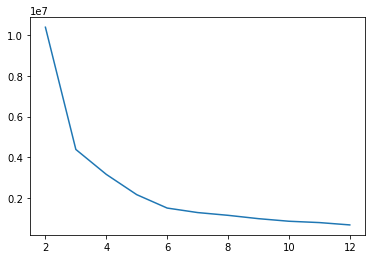

In [32]:
ks = range(2,13)
inertias = []

for k in ks:
    km = KMeans(init = 'k-means++', n_clusters = k, n_init = 12)
    km.fit(X)
    inertias.append(km.inertia_)
    
sns.lineplot(x = ks, y = inertias);

In [33]:
X = airbnb_reordered.iloc[:, :-1].values
from sklearn.cluster import KMeans 

k_mean = KMeans(init = 'k-means++', n_clusters = 3, n_init = 12)
k_mean.fit(X)

k_mean.labels_[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
airbnb_reordered['cluster'] = k_mean.labels_
airbnb_reordered.head()

,latitude,longitude,price,minimum_nights,calculated_host_listings_count,availability_365,multiple_host_listings,neighbourhood_prop_reviews,neighbourhood_total_listings,bronx,brooklyn,manhattan,queens,entire_home_apt,private_room,has_reviews,cluster
0,-1.035130,-0.356662,0.405660,-0.50,5.0,1.409692,1,-0.107057,-0.454414,0,1,0,0,0,1,1,0
1,0.418407,-0.600278,1.122642,-0.50,1.0,1.365639,1,-3.441776,0.206464,0,0,1,0,1,0,1,0
2,1.177155,0.294476,0.415094,0.00,0.0,1.409692,0,0.510114,0.743367,0,0,1,0,0,1,0,0
3,-0.519482,-0.087189,-0.160377,-0.50,0.0,0.656388,0,0.699991,-0.262904,0,1,0,0,1,0,1,0
4,1.033212,0.249813,-0.245283,1.75,0.0,-0.198238,0,0.822819,0.000000,0,0,1,0,1,0,1,0


In [35]:
airbnb_reordered['cluster'].value_counts()

0    47335
2     1001
1      559
Name: cluster, dtype: int64

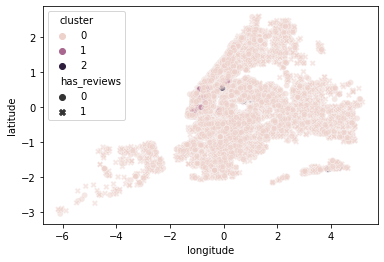

In [36]:
sns.scatterplot(data = airbnb_reordered, x = 'longitude', y = 'latitude', hue = 'cluster', style = 'has_reviews', alpha = 0.5);

In [38]:
airbnb_reordered.groupby(['manhattan', 'bronx', 'cluster'])['has_reviews'].sum()

manhattan  bronx  cluster
0          0      0          21225
                  1              0
                  2            110
           1      0            876
1          0      0          15964
                  1            235
                  2            433
Name: has_reviews, dtype: int64

In [41]:
airbnb_reordered[airbnb_reordered['cluster'].isin([1,2])].iloc[:, -8:].drop_duplicates()

,bronx,brooklyn,manhattan,queens,entire_home_apt,private_room,has_reviews,cluster
1386,0,0,1,0,1,0,1,2
2631,0,1,0,0,1,0,1,2
3679,0,1,0,0,1,0,0,2
4445,0,0,1,0,1,0,0,2
7134,0,0,0,1,0,1,1,2
7309,0,1,0,0,0,1,1,2
7441,0,1,0,0,0,1,0,2
15434,0,0,0,1,0,1,0,2
18949,0,0,1,0,0,1,1,2
26137,0,0,1,0,1,0,0,1


In [48]:
airbnb.head()

,latitude,longitude,price,minimum_nights,calculated_host_listings_count,availability_365,has_reviews,multiple_host_listings,neighbourhood_prop_reviews,neighbourhood_total_listings,bronx,brooklyn,manhattan,queens,entire_home_apt,private_room
0,-1.035130,-0.356662,0.405660,-0.50,5.0,1.409692,1,1,-0.107057,-0.454414,0,1,0,0,0,1
1,0.418407,-0.600278,1.122642,-0.50,1.0,1.365639,1,1,-3.441776,0.206464,0,0,1,0,1,0
2,1.177155,0.294476,0.415094,0.00,0.0,1.409692,0,0,0.510114,0.743367,0,0,1,0,0,1
3,-0.519482,-0.087189,-0.160377,-0.50,0.0,0.656388,1,0,0.699991,-0.262904,0,1,0,0,1,0
4,1.033212,0.249813,-0.245283,1.75,0.0,-0.198238,1,0,0.822819,0.000000,0,0,1,0,1,0


In [49]:
all_data = pd.read_csv('data/AB_NYC_2019.csv')
lat_long = all_data[['latitude', 'longitude']]
lat_long.head()

,latitude,longitude
0,40.64749,-73.97237
1,40.75362,-73.98377
2,40.80902,-73.94190
3,40.68514,-73.95976
4,40.79851,-73.94399


In [51]:
all_data.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [53]:
from sklearn.cluster import KMeans 

k_mean = KMeans(init = 'k-means++', n_clusters = 5, n_init = 12)
k_mean.fit(lat_long.values)

k_mean.labels_[:10]

array([2, 4, 0, 1, 0, 4, 1, 4, 0, 4])

In [61]:
all_data['cluster'] = k_mean.labels_.astype(str)
all_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,cluster
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,4
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,1
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0


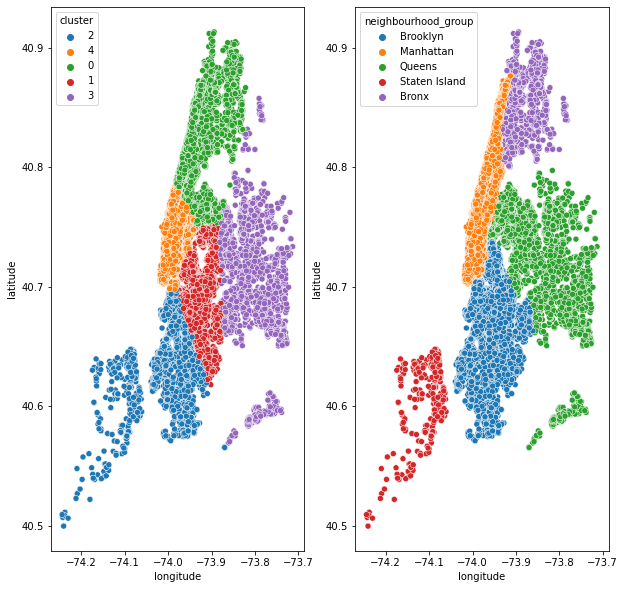

In [62]:
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,10))

sns.scatterplot(data = all_data, x = 'longitude', y = 'latitude', hue = 'cluster', ax = ax1)
sns.scatterplot(data = all_data, x = 'longitude', y = 'latitude', hue = 'neighbourhood_group', ax = ax2);